In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd workspace/theislab/mubind/notebooks/concatenation

/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/mubind/notebooks/concatenation


In [3]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/rio/miniconda3/envs/mubind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda:0


In [4]:
# import glob
# import pickle
# import os
# metrics_list = glob.glob('../../../mubind-pipeline/output/snakemake/*/metrics.tsv')
# metrics = pd.concat([pd.read_csv(f, index_col=0) for f in metrics_list])
#
# selex = metrics[~metrics['counts_path'].str.contains('PBM')]
# selex.shape
# selex.sort_values('r2_counts', ascending=False)


In [5]:
import os

In [6]:
# os.path.basename(selex.sort_values('r2_counts', ascending=False)['counts_path'])[0]))

In [7]:
import glob
import pickle
import os
models_list = glob.glob('../../../mubind-pipeline/output/snakemake/*/*/models/*.h5')
print(len(models_list))
models = []
for model_path in models_list:
    # if not 'N_200' in model_path or 'K_1' in model_path or not 'B_64' in model_path or not 'L_0.01' in model_path:
    #     continue
    if not 'EGR' in model_path:
        continue
    pkl_path = model_path.replace('.h5', '.pkl')
    print(pkl_path)

    if not os.path.exists(model_path) or not os.path.exists(pkl_path):
        continue
    model = pickle.load(open(pkl_path, 'rb'))
    # model.load_state_dict(torch.load(model_path))
    models.append(model)
    # break
    continue
    # model = pickle.load(open(pkl_path, 'rb'))

# results
results_paths = glob.glob('../../../mubind-pipeline/output/snakemake/*/*/metrics.tsv')
print(len(models_list))
metrics = []
for results_path in results_paths:
    # print(results_path)
    # if not 'N_200' in model_path or 'K_1' in model_path or not 'B_64' in model_path or not 'L_0.01' in model_path:
    #     continue
    if not 'EGR' in results_path:
        continue

    df = pd.read_csv(results_path, index_col=0)
    metrics.append(df)

metrics = pd.concat(metrics)

80
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/models/N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_ES0_TACTAT20NATC_0-TACTAT20NATC_1000.pkl
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/models/N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_ES0_TCTCTT20NGA_0-TCTCTT20NGA_1000.pkl
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/models/N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TACTAT20NATC_0_0-TACTAT20NATC_1000.pkl
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/models/N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TAGACA40NGTC_0_0-TAGACA40NGTC_1000.pkl
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/models/N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TCAGCC40NTTC_0_0-TCAGCC40NTTC_1000.pkl
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/models/N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TCCGCT40NGCG_0_0-TCCGCT40NGCG_1000.pkl
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/models/N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TCTCTT20NGA_0_0-TCTCTT20NGA_1000.pkl
../../../mubind-pipeline/output/snakem

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [9]:
binding_modes = mb.tl.binding_modes("../../../mubind-pipeline/output/snakemake/SELEX/EGR1/*/*", device=device)

Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_ES0_TACTAT20NATC_0-TACTAT20NATC_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_ES0_TCTCTT20NGA_0-TCTCTT20NGA_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TACTAT20NATC_0_0-TACTAT20NATC_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TAGACA40NGTC_0_0-TAGACA40NGTC_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TCAGCC40NTTC_0_0-TCAGCC40NTTC_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TCCGCT40NGCG_0_0-TCCGCT40NGCG_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TCTCTT20NGA_0_0-TCTCTT20NGA_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_EGR1-ZeroCycle_TTGTAC40NGTA_0_0-TTGTAC40NGTA_1000.pkl
# of models 8


In [35]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 3, 8
rcParams['figure.dpi'] = 90
# binding_modes

(8, 2)


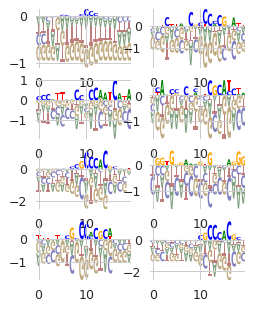

In [40]:
mb.pl.conv_mono(binding_modes, n_rows=len(binding_modes), n_cols=2, title=False)

In [41]:
reduced_groups = mb.tl.reduce_filters(binding_modes)

iteration 1
# grouping (1, 13)
[7 4 2 0 15 15 15 4.9205322265625 4.947243690490723 0 0.006992705663045247
 '7_4' False]
option 2
(4, 20) (4, 20) (4, 22) (4, 22) 0 -2
# of remaining groups 7
iteration 2
# grouping (0, 0)
done. No more groups to generate


(8, 2)


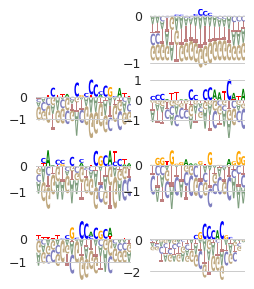

In [48]:
for i, mono_best in enumerate(reduced_groups):
    # print(mono_best.shape, model.binding_modes.conv_mono[i + 1].weight.shape)
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
    new_w = mono_best.reshape([1, 1] + list(mono_best.shape))
    model.binding_modes.conv_mono[i + 1].weight = torch.nn.Parameter(torch.tensor(new_w, dtype=torch.float))
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
# move the model a final time to the GPU
model = model.to(device)
mb.pl.conv_mono(model, n_rows=len(reduced_groups) + 1, n_cols=2, title=False, xticks=False)

### Using the generated models, reload the data, set them up as priors, and relearn actitivies

In [13]:
import os

n_sample = 1000
df = []

input_paths = glob.glob('../../../mubind-pipeline/output/snakemake/SELEX/*/*.tsv.gz')
batch = 0
batch_by_name = {}
for p in input_paths:
    if not 'EGR' in p:
        continue
    # print(p)
    df2 = pd.read_csv(p, sep='\t', index_col=0) # .head(100)
    assert 'batch' in df2
    # print(df2.columns)
    # df2 = df2.sample(100000)
    n_rounds = len(df2.columns) - 2
    df2.columns =  list(range(n_rounds)) + ['batch', 'is_count_data']
    df2['batch'] = batch
    batch_by_name[batch] = os.path.basename(p)
    df2['n_rounds'] = n_rounds
    # df2 = mb.pp.sample_rounds(df2, n_rounds, n_sample_per_round)
    print(df2.shape)
    df2 = df2.sample(n_sample)
    print(p, df2.shape, n_rounds)
    batch += 1
    df.append(df2)
    # assert False
    # break

df = pd.concat(df)
df = df[[c for c in df.columns if not c in ['batch', 'is_count_data', 'n_rounds']] + ['batch', 'is_count_data', 'n_rounds']]



(1000, 7)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycle_ES0_TACTAT20NATC_0-TACTAT20NATC_1000.tsv.gz (1000, 7) 4
(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycle_ES0_TCTCTT20NGA_0-TCTCTT20NGA_1000.tsv.gz (1000, 8) 5
(1000, 7)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycle_TACTAT20NATC_0_0-TACTAT20NATC_1000.tsv.gz (1000, 7) 4
(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycle_TAGACA40NGTC_0_0-TAGACA40NGTC_1000.tsv.gz (1000, 8) 5
(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycle_TCAGCC40NTTC_0_0-TCAGCC40NTTC_1000.tsv.gz (1000, 8) 5
(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycle_TCCGCT40NGCG_0_0-TCCGCT40NGCG_1000.tsv.gz (1000, 8) 5
(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycle_TCTCTT20NGA_0_0-TCTCTT20NGA_1000.tsv.gz (1000, 8) 5
(1000, 8)
../../../mubind-pipeline/output/snakemake/SELEX/EGR1/EGR1-ZeroCycl

In [14]:
df['batch'].value_counts()


0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
Name: batch, dtype: int64

In [15]:
dataset = mb.datasets.SelexDataset(df, n_rounds=df['n_rounds'], labels=list(df.columns[:-3]), store_rev=False)
train = tdata.DataLoader(dataset=dataset,
                         # batch_size=256,
                         batch_size=512,
                         shuffle=False)


In [16]:
n_kernels = len(reduced_groups)

In [17]:
criterion = mb.tl.PoissonLoss()

n_rounds = train.dataset.n_rounds
n_batches = train.dataset.n_batches
enr_series = train.dataset.enr_series

model = mb.models.Multibind(
    datatype="selex",
    kernels=[0] + [m.shape[-1] for m in reduced_groups],
    n_rounds=n_rounds,
    init_random=False,
    n_batches=n_batches,
    enr_series=enr_series,
).to(device)



In [20]:
# block mononucleotide but free dinucleotide and activities to calibrate themselves during training
verbose = 1
i = -1
feat_i = 'mono'
for ki in range(n_kernels + 1):
    mask_mono = (ki == i) and (feat_i == 'mono')
    mask_dinuc = True # (ki == i) and (feat_i == 'dinuc')
    if verbose != 0:
        print("setting grad status of kernel (mono, dinuc) at %i to (%i, %i)" % (ki, mask_mono, mask_dinuc))
    model.binding_modes.update_grad_mono(ki, mask_mono)
    model.binding_modes.update_grad_di(ki, mask_dinuc)

setting grad status of kernel (mono, dinuc) at 0 to (0, 1)
setting grad status of kernel (mono, dinuc) at 1 to (0, 1)
setting grad status of kernel (mono, dinuc) at 2 to (0, 1)
setting grad status of kernel (mono, dinuc) at 3 to (0, 1)
setting grad status of kernel (mono, dinuc) at 4 to (0, 1)
setting grad status of kernel (mono, dinuc) at 5 to (0, 1)
setting grad status of kernel (mono, dinuc) at 6 to (0, 1)
setting grad status of kernel (mono, dinuc) at 7 to (0, 1)


In [21]:
# assert False
next_optimiser = topti.Adam(model.parameters(), lr=0.025, weight_decay=0.001)
next_early_stopping = 25
log_each = 25
dirichlet_regularization = 0
exp_max = 40
verbose = 1
num_epochs = 1000

mb.tl.optimize_simple(
    model,
    train,
    device,
    next_optimiser,
    criterion,
    num_epochs=num_epochs,
    early_stopping=next_early_stopping,
    log_each=log_each,
    dirichlet_regularization=dirichlet_regularization,
    exp_max=exp_max,
    verbose=verbose,
)


optimizer:  <class 'torch.optim.adam.Adam'> 
criterion: <class 'mubind.tl.loss.PoissonLoss'> 
# epochs: 1000 
early_stopping: 25
lr= 0.025, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.545911 , best epoch: 24 secs per epoch: 0.298 s
Epoch: 51, Loss: 0.526532 , best epoch: 49 secs per epoch: 0.265 s
Epoch: 76, Loss: 0.521973 , best epoch: 74 secs per epoch: 0.249 s
Epoch: 101, Loss: 0.520772 , best epoch: 99 secs per epoch: 0.241 s
Epoch: 126, Loss: 0.520500 , best epoch: 124 secs per epoch: 0.242 s
Epoch: 151, Loss: 0.520454 , best epoch: 149 secs per epoch: 0.238 s
Epoch: 176, Loss: 0.520454 , best epoch: 160 secs per epoch: 0.239 s
Epoch: 186, Loss: 0.5205 , best epoch: 160 secs per epoch: 0.238 s
early stop!
Final loss: 0.5204571057
Total time (model/function): (44.078s / 44.078s)
Time per epoch (model/function): (0.238s/ 0.238s)
Time per epoch per 1k trials: 0.030s
Current time: 2022-12-31 18:42:49.590490


In [22]:
print('here...')

here...


<AxesSubplot: >

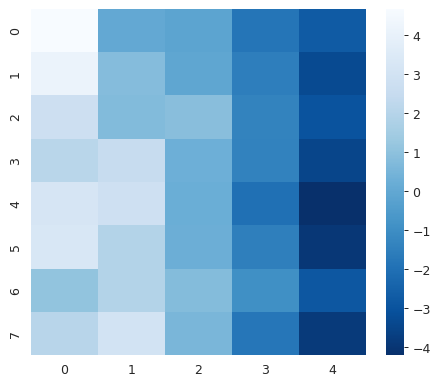

In [23]:
import seaborn as sns
rcParams['figure.figsize'] = 6, 5
sns.heatmap(model.get_log_etas().detach().cpu().numpy(), cmap='Blues_r')

0
1
2
3
4
5
6
7


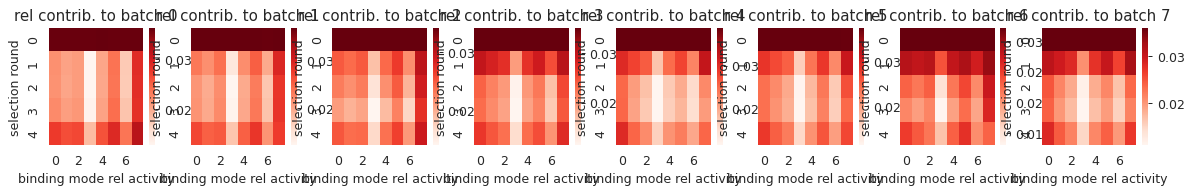

In [24]:
rcParams['figure.figsize'] = 20, 20
mb.pl.activities(model, n_cols=10, n_rows=8)

(8, 2)


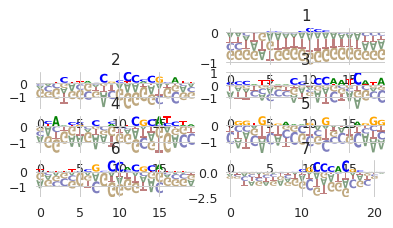

In [25]:
rcParams['figure.figsize'] = 5, 5
mb.pl.conv_mono(model, n_rows=len(reduced_groups) + 1, n_cols=2)


In [26]:
metrics

,tf_name,r0,library,counts_path,n_sample_parm,batch_size,learning_rate,n_epochs,n_kernels,best_loss,r2_counts,r2_foldchange,r2_enr,r2_fc,pearson_foldchange,running_time
0,EGR1,ZeroCycle_ES0_TACTAT20NATC_0,TACTAT20NATC,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.436485,0.494139,0.010868,-0.024182,0.011287,0.106242,48.636036
1,EGR1,ZeroCycle_TACTAT20NATC_0_0,TACTAT20NATC,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.542565,0.166802,0.093147,0.073088,0.100249,0.316621,79.168808
2,EGR1,ZeroCycle_TAGACA40NGTC_0_0,TAGACA40NGTC,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.492656,0.081996,0.113106,0.164831,0.150982,0.388564,72.942578
3,EGR1,ZeroCycle_TCAGCC40NTTC_0_0,TCAGCC40NTTC,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.454931,0.163468,0.373372,0.284110,0.375566,0.612834,65.768810
4,EGR1,ZeroCycle_TCCGCT40NGCG_0_0,TCCGCT40NGCG,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.497820,0.061151,0.159068,0.124512,0.160108,0.400135,68.673207
5,EGR1,ZeroCycle_ES0_TCTCTT20NGA_0,TCTCTT20NGA,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.456127,0.283408,0.221209,0.274042,0.224246,0.473546,51.925266
6,EGR1,ZeroCycle_TCTCTT20NGA_0_0,TCTCTT20NGA,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.461303,0.625288,0.414486,0.806964,0.422642,0.650109,49.628970
7,EGR1,ZeroCycle_TTGTAC40NGTA_0_0,TTGTAC40NGTA,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.451354,0.177469,0.364326,0.336544,0.371544,0.609544,56.035980


0


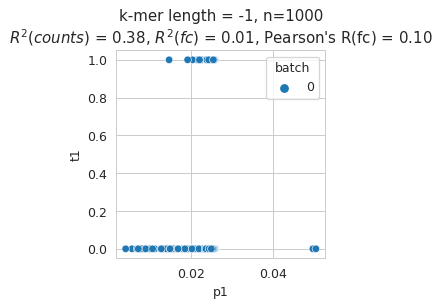

1


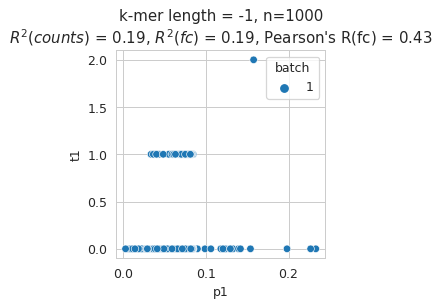

2


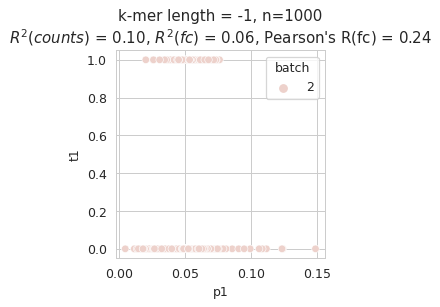

3


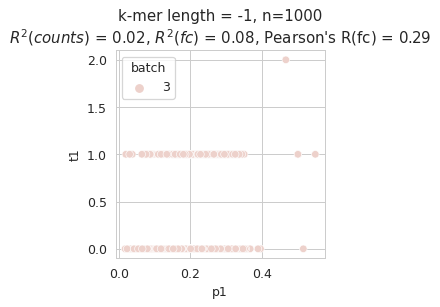

4


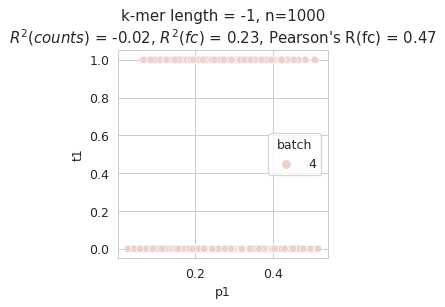

5


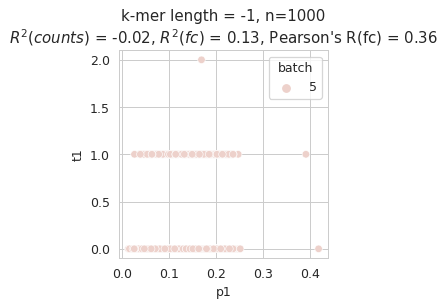

6


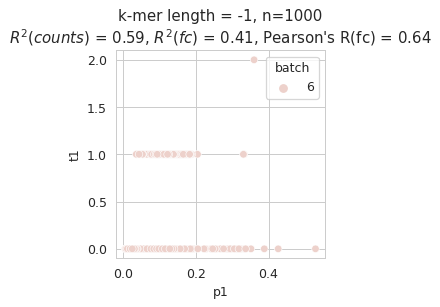

7


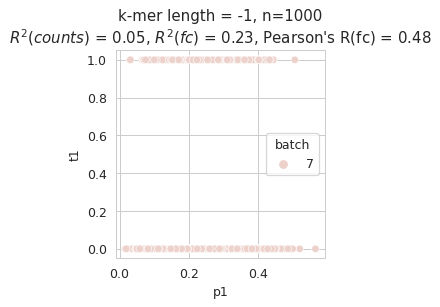

In [27]:
rcParams['figure.figsize'] = 3, 3
scores_by_batch = mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1', show=True, by='batch')
df_batch = pd.DataFrame(scores_by_batch).T


In [28]:
df_batch['filename'] = df_batch.index.astype(int).map(batch_by_name)
metrics['filename'] = list(metrics['counts_path'].apply(os.path.basename))


In [29]:
merged = df_batch.merge(metrics, on='filename')

In [32]:
xlab, ylab = 'r2_counts_x', 'r2_counts_y'
x, y = merged[xlab], merged[ylab]

import scipy
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=0.9785322582945093, pvalue=2.433773792208725e-05)

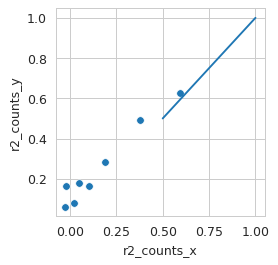

In [30]:
sns.scatterplot(data=merged, x=xlab, y=ylab)
plt.plot([.5, 1], [.5, 1])